In [1]:
from ciboulette.indiclient.imx477 import imx477Cam
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits

In [2]:
#ccd1 = imx477Cam(host="irene14", port=7624)
ccd1 = imx477Cam(host="irene14", port=7624)

In [4]:
ccd1.connect()

In [3]:
ccd1.default

In [15]:
ccd1.gain = 5

In [3]:
ccd1.binning2

In [11]:
ccd1.binning1

In [5]:
ccd1.raw

In [3]:
ccd1.rgb

In [3]:
ccd1.compress

In [7]:
ccd1.uncompress

In [6]:
ccd1.ready

True

In [11]:
ccd1.local

In [5]:
ccd1.client

In [10]:
ccd1.dir('/home/ut1/CAM')

In [11]:
ccd1.prefix('irene14_XXX')

In [9]:
ccd1.temperature

0.0

In [6]:
# Client
hdul = ccd1.expose(exptime=0.5, exptype="Light")

In [7]:
# For client
hdul[0].data

array([[4128, 4128, 4112, ..., 4096, 4016, 4112],
       [4000, 4112, 4096, ..., 4208, 4128, 4160],
       [4080, 4144, 3968, ..., 4112, 3968, 4144],
       ...,
       [4128, 4192, 4096, ..., 4064, 4112, 4048],
       [4048, 3984, 4032, ..., 4224, 4160, 4096],
       [4128, 4240, 4096, ..., 4032, 4096, 4032]], dtype=uint16)

In [7]:
# Local
ccd1.expose(exptime=0.5, exptype="Light")

In [8]:
ccd1.isfile.split('file ')[1]

'/home/ut1/CAM/irene14_004.fits'

In [25]:
r = hdul[0].data[0]
g = hdul[0].data[1]
b = hdul[0].data[2]

ir = r.astype('float64') 
ig = g.astype('float64')
ib = g.astype('float64')

In [11]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4056                                                  
NAXIS2  =                 3040                                                  
EXTEND  =                    T                                                  
BSCALE  =                    1 / default scaling factor                         
BZERO   =                32768 / offset data range                              
ROWORDER= 'TOP-DOWN'           / Row order                                      
INSTRUME= 'indi_pylibcamera'   / CCD Name                                       
TELESCOP= '' / Telescope name                                                   
EXPTIME =                  0.5 / [s] Total Exposure Time                        
CCD-TEMP=                 20

In [20]:
hdr = hdul[0].header
hdr['comment'] = ccd1.HDUComment
list(hdr.keys())

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'EXTEND',
 'BSCALE',
 'BZERO',
 'ROWORDER',
 'INSTRUME',
 'TELESCOP',
 'EXPTIME',
 'CCD-TEMP',
 'PIXSIZE1',
 'PIXSIZE2',
 'XBINNING',
 'YBINNING',
 'XPIXSZ',
 'YPIXSZ',
 'FRAME',
 'IMAGETYP',
 'FOCALLEN',
 'APTDIA',
 'SITELAT',
 'SITELONG',
 'AIRMASS',
 'OBJCTAZ',
 'OBJCTALT',
 'OBJCTRA',
 'OBJCTDEC',
 'RA',
 'DEC',
 'PIERSIDE',
 'EQUINOX',
 'DATE-OBS',
 'DATE-END',
 'GAIN',
 'XBAYROFF',
 'YBAYROFF',
 'BAYERPAT',
 'OFFSET_0',
 'OFFSET_1',
 'OFFSET_2',
 'OFFSET_3',
 'FILTER',
 'CAMERA',
 'COMMENT']

In [21]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4056                                                  
NAXIS2  =                 3040                                                  
EXTEND  =                    T                                                  
BSCALE  =                    1 / default scaling factor                         
BZERO   =                32768 / offset data range                              
ROWORDER= 'TOP-DOWN'           / Row order                                      
INSTRUME= 'indi_pylibcamera'   / CCD Name                                       
TELESCOP= '' / Telescope name                                                   
EXPTIME =                  0.5 / [s] Total Exposure Time                        
CCD-TEMP=                 20

In [26]:
image = make_lupton_rgb(ir, ig, ib, minimum=55,  Q=3, stretch=120)

In [6]:
from astropy.visualization import simple_norm

In [8]:
image = hdul[0].data
#norm = simple_norm(image, stretch='sqrt')

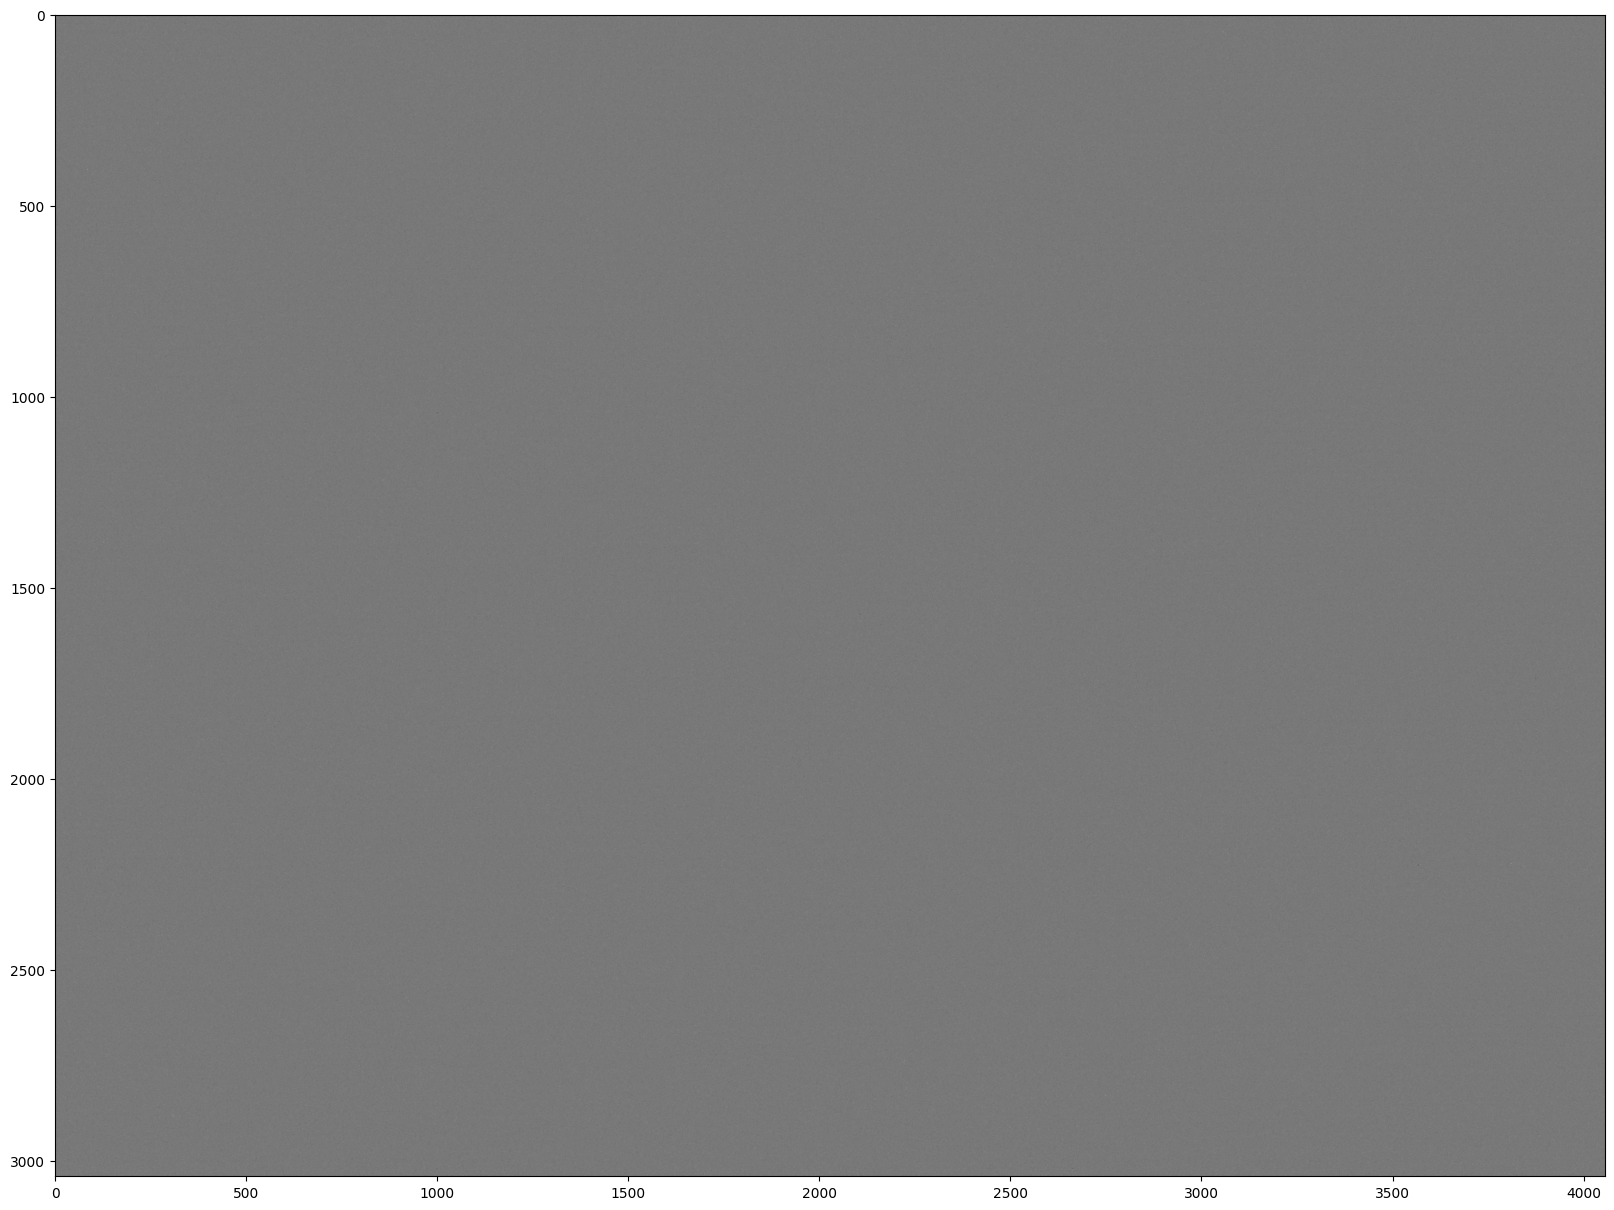

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(image, cmap='gray')
plt.show()
hdul.close()

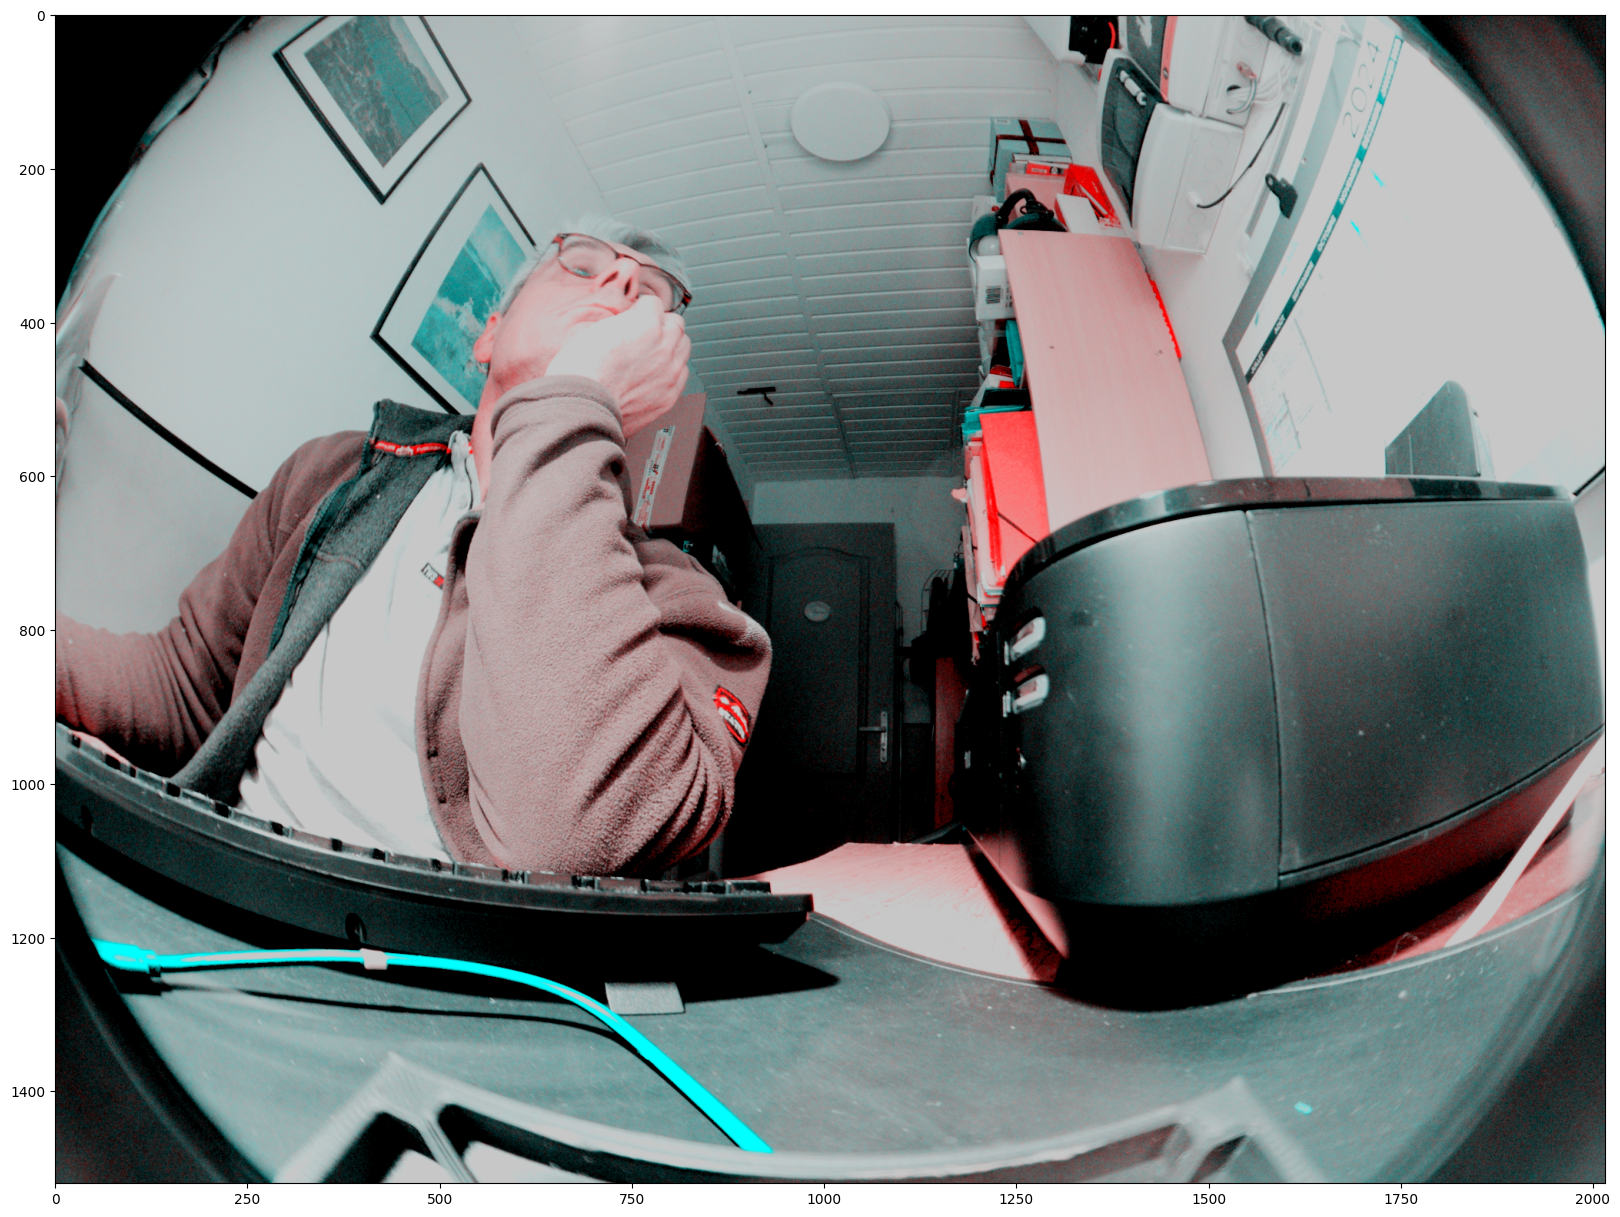

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()
hdul.close()

In [37]:
hdul.writeto('new1.fits', overwrite=True)